In [1]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plot
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('C:\VS_Workshop\Sem 6\Data Mining and Predictive Modelling\Assignments\Ass5\insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Preprocessing

### Encoding categorial data

In [3]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
def encode(data, column):
    data[column] = LabelEncoder().fit_transform(data[column])

original_df = df.copy()
encode(df, 'sex')
encode(df, 'smoker')
encode(df, 'region')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
sb.set(font_scale = 1.9)

### The Heatmap

<AxesSubplot:>

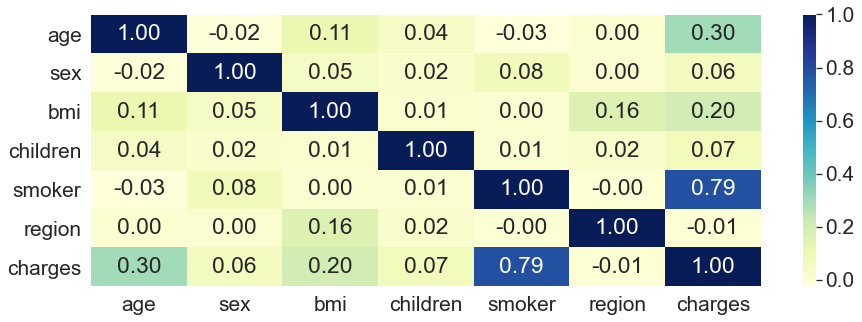

In [7]:
plot.figure(1, (15, 5))
sb.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt='.2f')

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
x = df.drop(['charges'], axis=1)
y = df['charges']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(1070, 6) (268, 6) (1070,) (268,)


In [17]:
model = LinearRegression().fit(xtrain, ytrain)

predictions = model.predict(xtest)
predictions[:5]

array([14971.95545411, 13692.36393326, 32159.35728327,  8737.49467136,
       17327.90142965])

In [21]:
# fpr, tpr, threshold = roc_curve(ytest, predictions)
# print(fpr)
# print(tpr)
# sb.scatterplot(x=fpr, y=tpr)

## Plotting graphs

### Smoker vs Gender

<AxesSubplot:xlabel='sex', ylabel='smoker'>

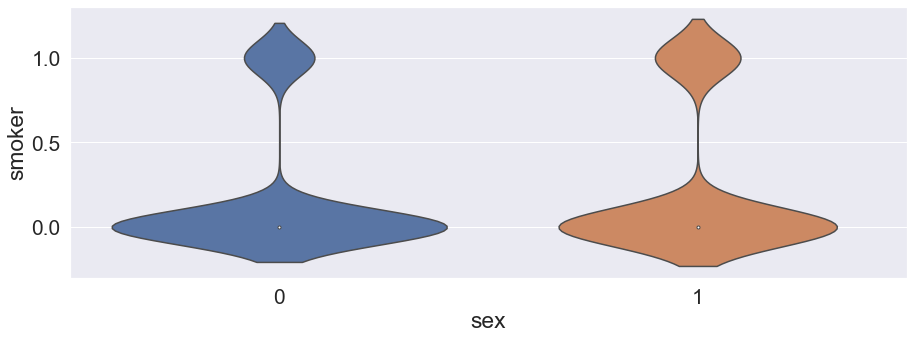

In [31]:
plot.figure(1, (15, 5))
sb.violinplot(x='sex', y='smoker', data=df)

We have more non-smokers than smokers. Good going people!

<AxesSubplot:xlabel='age', ylabel='charges'>

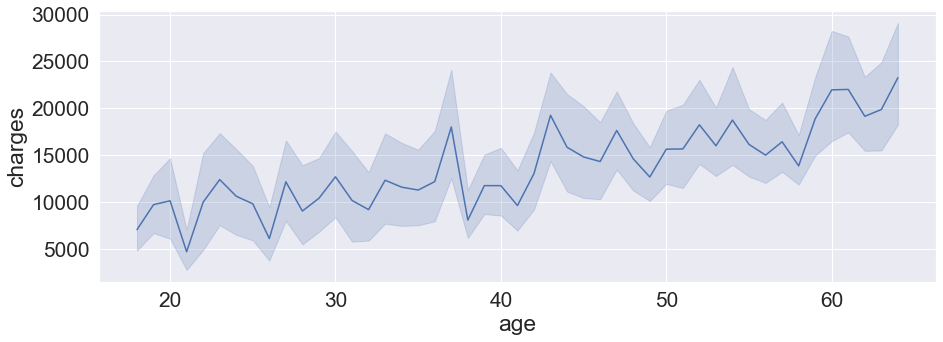

In [32]:
plot.figure(1, (15, 5))
sb.lineplot(x='age', y='charges', data=df)

<AxesSubplot:xlabel='region', ylabel='smoker'>

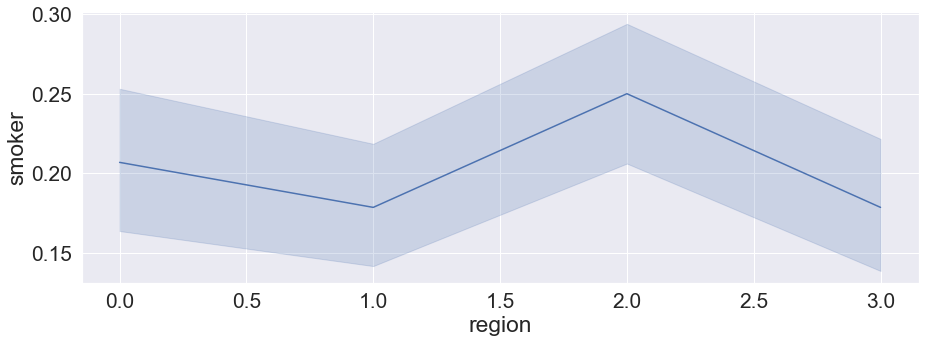

In [33]:
plot.figure(1, (15, 5))
sb.lineplot(x='region', y='smoker', data=df)

We have the most smokers in region 2

In [42]:
# print(df['region'].unique())
# print(original_df['region'].unique())

f"People in {original_df[df['region'] == 2]['region'].unique()[0]} like to smoke the most"

'People in southeast like to smoke the most'